In [15]:
#Creates a link into sql server database using the panda's dataframe

import pandas as pd
import numpy as np
import pyodbc 
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create




conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-ANJFLILG\SQLEXPRESS;'
                      'Database=PortfolioProject;'
                      'Trusted_Connection=yes;')


df = pd.read_sql_query('SELECT * FROM dbo.NashvilleHousing', conn)

print(df)
print(type(df))


""" #another way to connect to the sql server

cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.NashvilleHousing')

for i in cursor:
    print(i)
"""

C:\Users\jjkrz\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


       UniqueID          ParcelID        LandUse  \
0         2045.0  007 00 0 125.00  SINGLE FAMILY   
1        16918.0  007 00 0 130.00  SINGLE FAMILY   
2        54582.0  007 00 0 138.00  SINGLE FAMILY   
3        43070.0  007 00 0 143.00  SINGLE FAMILY   
4        22714.0  007 00 0 149.00  SINGLE FAMILY   
...          ...              ...            ...   
56475    11358.0  119 06 0 204.00  SINGLE FAMILY   
56476    47731.0  119 06 0 204.00  SINGLE FAMILY   
56477    51410.0  119 06 0 204.00  SINGLE FAMILY   
56478     8336.0  119 06 0 217.00  SINGLE FAMILY   
56479    19018.0  119 06 0 219.00  SINGLE FAMILY   

                          PropertyAddress    SaleDate  SalePrice  \
0      1808  FOX CHASE DR, GOODLETTSVILLE  2013-04-09   240000.0   
1      1832  FOX CHASE DR, GOODLETTSVILLE  2014-06-10   366000.0   
2      1864 FOX CHASE  DR, GOODLETTSVILLE  2016-09-26   435000.0   
3      1853  FOX CHASE DR, GOODLETTSVILLE  2016-01-29   255000.0   
4      1829  FOX CHASE DR, GOODLETT

" #another way to connect to the sql server\n\ncursor = conn.cursor()\ncursor.execute('SELECT * FROM dbo.NashvilleHousing')\n\nfor i in cursor:\n    print(i)\n"

In [12]:
# lets see if there is any missing data

for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col,pct_missing))

UniqueID  - 5.311614730878187e-05%
ParcelID - 0.0%
LandUse - 0.0%
PropertyAddress - 5.311614730878187e-05%
SaleDate - 0.00010623229461756374%
SalePrice - 0.00010623229461756374%
LegalReference - 5.311614730878187e-05%
SoldAsVacant - 5.311614730878187e-05%
OwnerName - 0.5527443342776204%
OwnerAddress - 0.5393944759206799%
Acreage - 0.5393944759206799%
TaxDistrict - 0.5393944759206799%
LandValue - 0.5393944759206799%
BuildingValue - 0.5394298866855524%
TotalValue - 0.5394298866855524%
YearBuilt - 0.5721848441926346%
Bedrooms - 0.5722910764872521%
FullBath - 0.5702195467422096%
HalfBath - 0.5725389518413597%
PropertySplitAddress - 5.311614730878187e-05%
PropertySplitCity - 5.311614730878187e-05%


In [13]:
#lets start looking at correlation

df.corr() #Pearson is the default correlation (others: kendall, spearman)

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,1.000000,0.017622,-0.001124,-0.055106,-0.080390,-0.081047,0.006931,-0.040688,-0.058769,-0.024049
SalePrice,0.017622,1.000000,0.204155,0.603684,0.574680,0.661794,0.037306,0.372802,0.512652,0.239298
Acreage,-0.001124,0.204155,1.000000,0.005215,-0.004437,-0.004589,-0.429573,-0.023115,0.184259,0.046238
LandValue,-0.055106,0.603684,0.005215,1.000000,0.516269,0.765842,-0.016195,0.341816,0.513283,0.180919
BuildingValue,-0.080390,0.574680,-0.004437,0.516269,1.000000,0.945603,0.178108,0.447450,0.587706,0.347322
TotalValue,-0.081047,0.661794,-0.004589,0.765842,0.945603,1.000000,0.126930,0.452139,0.625541,0.324212
YearBuilt,0.006931,0.037306,-0.429573,-0.016195,0.178108,0.126930,1.000000,0.158566,0.293456,0.263257
Bedrooms,-0.040688,0.372802,-0.023115,0.341816,0.447450,0.452139,0.158566,1.000000,0.612898,0.193919
FullBath,-0.058769,0.512652,0.184259,0.513283,0.587706,0.625541,0.293456,0.612898,1.000000,0.093998
HalfBath,-0.024049,0.239298,0.046238,0.180919,0.347322,0.324212,0.263257,0.193919,0.093998,1.000000


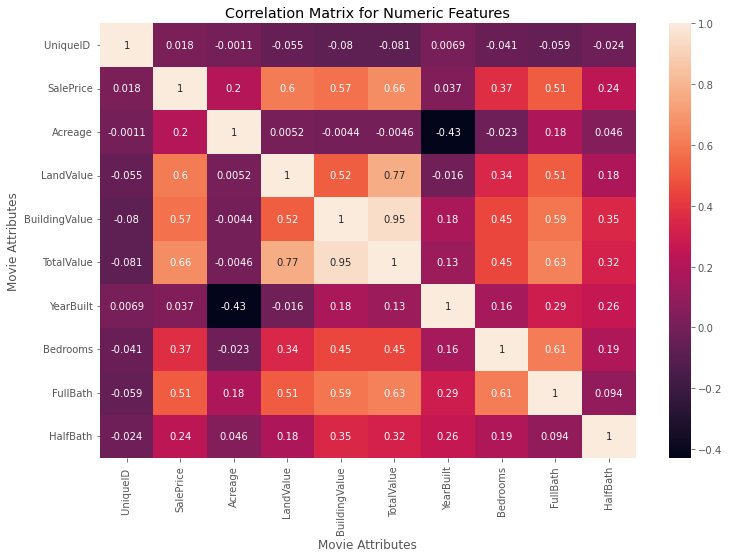

In [16]:
#high correlation between budget and gross
#visualizing the correlation matrix above

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')



plt.show()


In [19]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

UniqueID       UniqueID         1.000000
               SalePrice        0.017622
               Acreage         -0.001124
               LandValue       -0.055106
               BuildingValue   -0.080390
               TotalValue      -0.081047
               YearBuilt        0.006931
               Bedrooms        -0.040688
               FullBath        -0.058769
               HalfBath        -0.024049
SalePrice      UniqueID         0.017622
               SalePrice        1.000000
               Acreage          0.204155
               LandValue        0.603684
               BuildingValue    0.574680
               TotalValue       0.661794
               YearBuilt        0.037306
               Bedrooms         0.372802
               FullBath         0.512652
               HalfBath         0.239298
Acreage        UniqueID        -0.001124
               SalePrice        0.204155
               Acreage          1.000000
               LandValue        0.005215
               B

In [18]:
# this sets the data fame to scroll all possible values rather than just a summary

pd.set_option('display.max_rows', None)

In [20]:
# sorting the pairs to see correlations much easier

sorted_pairs = corr_pairs.sort_values()


sorted_pairs

Acreage        YearBuilt       -0.429573
YearBuilt      Acreage         -0.429573
TotalValue     UniqueID        -0.081047
UniqueID       TotalValue      -0.081047
               BuildingValue   -0.080390
BuildingValue  UniqueID        -0.080390
UniqueID       FullBath        -0.058769
FullBath       UniqueID        -0.058769
LandValue      UniqueID        -0.055106
UniqueID       LandValue       -0.055106
Bedrooms       UniqueID        -0.040688
UniqueID       Bedrooms        -0.040688
               HalfBath        -0.024049
HalfBath       UniqueID        -0.024049
Acreage        Bedrooms        -0.023115
Bedrooms       Acreage         -0.023115
LandValue      YearBuilt       -0.016195
YearBuilt      LandValue       -0.016195
Acreage        TotalValue      -0.004589
TotalValue     Acreage         -0.004589
BuildingValue  Acreage         -0.004437
Acreage        BuildingValue   -0.004437
               UniqueID        -0.001124
UniqueID       Acreage         -0.001124
LandValue      A

In [26]:
#displaying only those with a high correlation defined as higher than 0.5

high_corr = sorted_pairs[ (sorted_pairs) > 0.5 ]

high_corr = high_corr[ (high_corr) < 1 ]

high_corr

SalePrice      FullBath         0.512652
FullBath       SalePrice        0.512652
LandValue      FullBath         0.513283
FullBath       LandValue        0.513283
BuildingValue  LandValue        0.516269
LandValue      BuildingValue    0.516269
BuildingValue  SalePrice        0.574680
SalePrice      BuildingValue    0.574680
FullBath       BuildingValue    0.587706
BuildingValue  FullBath         0.587706
SalePrice      LandValue        0.603684
LandValue      SalePrice        0.603684
FullBath       Bedrooms         0.612898
Bedrooms       FullBath         0.612898
TotalValue     FullBath         0.625541
FullBath       TotalValue       0.625541
TotalValue     SalePrice        0.661794
SalePrice      TotalValue       0.661794
TotalValue     LandValue        0.765842
LandValue      TotalValue       0.765842
TotalValue     BuildingValue    0.945603
BuildingValue  TotalValue       0.945603
dtype: float64